# Progetto di Metodi Informatici per la Gestione Aziendale

## Progetto base

In [13]:
#!pip install pandas
#!pip install seaborn
#!pip install scikit-surprise
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importazione del dataset delle review:

In [14]:
import json

data = []
pwd = os.getcwd()
if "Richard" in pwd:
    file_path = '/Users/Richard/Desktop/Progetto Metodi aziendale/Proj_metodi_informatici/data/Books.jsonl'
else:
    file_path = '/Users/susannamau/Dev/metodi_informatici/Books.jsonl'
with open(file_path, 'r') as f:
    for i, line in enumerate(f):
        if i == 1000:
            break
        data.append(json.loads(line))

print("Finito")

Finito


In [15]:
data[1:2]

[{'rating': 5.0,
  'title': 'Updated: after 1st arrived damaged this one is perfect',
  'text': 'Updated: after first book arrived very damaged the replacement arrived in perfect condition.',
  'images': [],
  'asin': '0593235657',
  'parent_asin': '0593235657',
  'user_id': 'AFKZENTNBQ7A7V7UXW5JJI6UGRYQ',
  'timestamp': 1640629604904,
  'helpful_vote': 1,
  'verified_purchase': True}]

Mi prendo i dati dello user

### 1. Analisi esplorativa (statistiche descrittive, analisi correlazione)
To perform an exploratory analysis on this dataset, we perform the following steps:

* Trasformazione del dataset in un dataframe Pandas,
* Controllo delle informazioni di base del dataframe come il numero di righe, di colonne e i tipi delle variabili,
* Controllo dei valori mancanti,
* Statistiche descrittive delle variabili numeriche (rating e helpful_vote),
* Visualizzazione dei dati.

Trasformazione in un dataframe Pandas:

In [16]:
df = pd.DataFrame(data)
df.head()
df

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,1.0,Not a watercolor book! Seems like copies imo.,It is definitely not a watercolor book. The p...,[{'small_image_url': 'https://m.media-amazon.c...,B09BGPFTDB,B09BGPFTDB,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1642399598485,0,True
1,5.0,Updated: after 1st arrived damaged this one is...,Updated: after first book arrived very damaged...,[],0593235657,0593235657,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1640629604904,1,True
2,5.0,Excellent! I love it!,I bought it for the bag on the front so it pai...,[],1782490671,1782490671,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1640383495102,0,True
3,5.0,Updated after 1st arrived damaged. Excellent,Updated: after 1st arrived damaged the replace...,[],0593138228,0593138228,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1640364906602,0,False
4,5.0,Beautiful patterns!,I love this book! The patterns are lovely. I ...,[{'small_image_url': 'https://m.media-amazon.c...,0823098079,0823098079,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1637312253230,0,True
...,...,...,...,...,...,...,...,...,...,...
995,5.0,A feast for body and soul,"Based on Jan Karon's Mitford series, the Mitfo...",[],B0017HZ0Y6,0670032395,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1245504975000,16,True
996,5.0,"A beautiful, heartbreaking look at love and lo...","Mahbod Seraji's haunting ""Rooftops of Tehran"" ...",[],045122681X,045122681X,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1245501300000,3,False
997,3.0,"A fleeting, delicate tale as light as rosewater","In ""Rosewater and Soda Bread,"" Marsha Mehran's...",[],081297249X,081297249X,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1245111599000,2,False
998,5.0,"Hip, quirky, romantic tale of film noir",Ever felt like there's a nagging voice in your...,[],0425218384,0425218384,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1244860930000,1,False


Ho importato le prime 1000 righe perché il file intero era troppo pesante. Ci sono 10 colonne che rappresentano:
 * Rating (float): rating of the product (from 1.0 to 5.0). It will be transformed in a categorical variable,
* Title	(str) : title of the user review,
* Text (str): text body of the user review,
* Images (list): images that users post after they have received the product. Each image has different sizes (small, medium, large), represented by the small_image_url, medium_image_url, and large_image_url respectively,
* asin (str): ID of the product,
* parent_asin (str): parent ID of the product,
* user_id (str): ID of the reviewer,
* timestamp (int): time of the review (unix time),
* verified_purchase (boolean): user purchase verification,
* helpful_vote (int): helpful votes of the review.

In [17]:
df['rating'] = df['rating'].astype('int')

Alcune statistiche descrittive delle variabili numeriche del dataset. Le statistiche descrittive su timestamp sono poco informative a causa della natura della variabile.

In [18]:
df.describe()

,rating,timestamp,helpful_vote
count,1000.000000,1.000000e+03,1000.000000
mean,4.477000,1.477203e+12,4.032000
std,0.948879,1.116759e+11,15.863563
min,1.000000,1.129661e+12,0.000000
25%,4.000000,1.403895e+12,0.000000
50%,5.000000,1.480937e+12,0.000000
75%,5.000000,1.561830e+12,2.000000
max,5.000000,1.678065e+12,330.000000


Mentre la variabile rating è molto sbilanciata verso sinistra (più della metà delle osservazioni hanno rating 5), la variabile helpful_vote è molto sbilanciata verso destra (più della metà delle osservazioni hanno valore 0).

Conteggio di quante reviews ci sono per ogni codice prodotto (asin) e del rating medio:

In [19]:
df_grouped = df.groupby('asin').agg(number_of_reviews = pd.NamedAgg(column='asin', aggfunc='count'),
                                    average_rating = pd.NamedAgg(column='rating', aggfunc='mean')).sort_values(by='number_of_reviews', ascending=False)
df_grouped.head()

,number_of_reviews,average_rating
asin,,
1741799953,2,4.0
0547636474,2,4.5
1454710179,2,5.0
B00K7MCE3C,2,4.5
1578563232,2,5.0


Conteggio dei valori mancanti:

In [20]:
missing_values = df.isnull().sum()
print(missing_values)

rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64


Nelle osservazioni importate non ci sono valori mancanti.

Visualizzazione della distribuzione dei ratings:

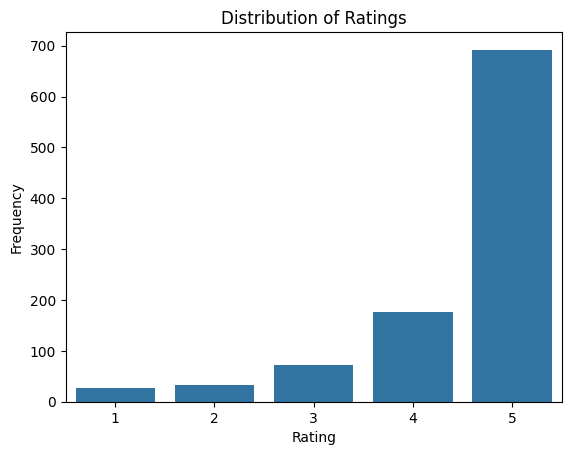

In [21]:
sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

La distribuzione dei ratings è asimmetrica negativa: le osservazioni con rating 5 sono molto più frequenti di quelle con punteggi inferiori.

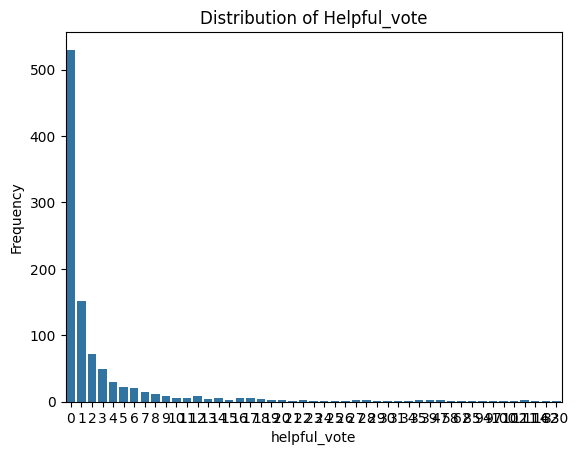

In [22]:
sns.countplot(x='helpful_vote', data=df)
plt.title('Distribution of Helpful_vote')
plt.xlabel('helpful_vote')
plt.ylabel('Frequency')
plt.show()

La distribuzione è asimmetrica positiva, con uno sbilanciamento importante verso destra.

### 2. Identificazione della configurazione ottimale dell’algoritmo K-NN per la predizione dei rating
In questo punto dovranno quindi essere testate le diverse combinazioni: similarità, valore di K, user/item based. Tramite le diverse metriche di performance (MSE e RMSE) individuare di conseguenza la configurazione ottimale.

In [23]:
df.columns #guardo le colonne di df che contiene le informazioni della tabella User

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

Creo la matrice User-Books
righe -> Utenti
colonne -> Libri con il loro codice
valore cella -> Rating dell'utente per il libro

In [24]:
user_item_matrix = df.pivot_table(index='user_id', columns='asin', values='rating', aggfunc='mean').fillna(0)

In [25]:
user_item_matrix = user_item_matrix.astype(int)
user_item_matrix

asin,0008119090,0060663723,0060734000,0060835575,0061148989,0061284416,0061375837,0061688592,0061688649,0061713244,...,B09F1JCGWB,B09HQKGZJY,B09JBKMY5W,B09M5LJYLT,B09NRDSSC7,B09SBNT62Z,B09TX1HS1Y,B09YVRPXC3,B0BB5Z9DM9,B0BQ5C8H2C
user_id,,,,,,,,,,,,,,,,,,,,,
AE2TA5GQH4JI5RQ4W5H5PQOVYBGA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AE3ZEVN65B3MWKIBLFRBGMJDGJCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AE4KVNO5P6N6SP6CQTZTIDHEAWFQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AE7Y5RLYIKHOZB5NKKOEKYG2SPSQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AHX4XWVVQUKT3FCNWCVASDF4Q56Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AHXBL3QDWZGJYH7A5CMPFNUPMF7Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AHY55PORR7VYL72JBUYNSO6KCA5A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 # Collaborative Filter

  Using cached scikit_surprise-1.1.4-cp312-cp312-win_amd64.whl
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/3e/df/963384e90733e08eac978cd103c34df181d1fec424de383cdc443f418dd4/scipy-1.13.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.6 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 811.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   ----------------------------- ---------- 225.3/301.8 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 301.8/301.8 kB 6.2 MB


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from surprise import Dataset, Reader

In [28]:
# Convert the pandas DataFrame into surprise dataset format
reader = Reader(rating_scale=(1, 5))
dataset_surprise = Dataset.load_from_df(df[['user_id', 'asin', 'rating']], reader)

In [29]:
rating_matrix = df[['user_id', 'asin', 'rating']]
rating_matrix

,user_id,asin,rating
0,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,B09BGPFTDB,1
1,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0593235657,5
2,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1782490671,5
3,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0593138228,5
4,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0823098079,5
...,...,...,...
995,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,B0017HZ0Y6,5
996,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,045122681X,5
997,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,081297249X,3
998,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,0425218384,5


In [30]:
# Verifica se ci sono rating pari a 0 nel DataFrame
has_zero_ratings = (rating_matrix['rating'] == 0).any()

# Stampa il risultato
print("Ci sono valori con rating 0 nel DataFrame?", has_zero_ratings)


Ci sono valori con rating 0 nel DataFrame? False


In [31]:
from surprise import accuracy, KNNBasic
from surprise import model_selection

In [32]:
# Initialize the algorithm
algo = KNNBasic()

In [33]:
# Split the dataset into train and test set
trainset, testset = model_selection.train_test_split(dataset_surprise, test_size=0.2, random_state=0)

In [34]:
# Train and test the algorithm
algo.fit(trainset)
predictions = algo.test(testset)
# Compute metrics
mse = accuracy.mse(predictions)
rmse = accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
MSE: 0.9490
RMSE: 0.9742


In [35]:
# Get a prediction for specific users and items.
uid = 'AFKZENTNBQ7A7V7UXW5JJI6UGRYQ'
iid = '0593235657'
pred = algo.predict(uid, iid, r_ui=3, verbose=True)


user: AFKZENTNBQ7A7V7UXW5JJI6UGRYQ item: 0593235657 r_ui = 3.00   est = 5.00   {'actual_k': 1, 'was_impossible': False}


In [36]:
#r_ui è il rating reale
#est è il valore predetto dal modello
#actual_k n° di neighbors più prossimi (k) che sono stati effettivamente utilizzati per calcolare la stima del rating.
#'was_impossible': False -> Se è possibile o meno fare previsione: True -> impossibile, False -> possibileS

In [37]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import cross_validate
import numpy as np

# Assume 'rating_matrix' is already defined as your DataFrame
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_matrix[['user_id', 'asin', 'rating']], reader)

# Define the list of configurations to test
sim_options = {
    'cosine': {'name': 'cosine'},
    'pearson': {'name': 'pearson'},
    'pearson_baseline': {'name': 'pearson_baseline'},
    'msd': {'name': 'msd'}
}
k_values = [5, 10, 20,50,100]
user_item_based = [True, False]

best_rmse = float('inf')
best_mse = float('inf')
best_config_rmse = {}
best_config_mse = {}

# Test all combinations
for sim_name, sim_option in sim_options.items():
    for k in k_values:
        for user_based in user_item_based:
            algo = KNNBasic(sim_options={'name': sim_option['name'], 'user_based': user_based}, k=k)
            results = cross_validate(algo, data, measures=['RMSE', 'MSE'], cv=3, verbose=False)
            avg_rmse = np.mean(results['test_rmse'])
            avg_mse = np.mean(results['test_mse'])

            # Track the best RMSE
            if avg_rmse < best_rmse:
                best_rmse = avg_rmse
                best_config_rmse = {'similarity': sim_name, 'k': k, 'user_based': user_based}

            # Track the best MSE
            if avg_mse < best_mse:
                best_mse = avg_mse
                best_config_mse = {'similarity': sim_name, 'k': k, 'user_based': user_based}

            print(f"Sim: {sim_name}, K: {k}, User-Based: {user_based}, RMSE: {avg_rmse}, MSE: {avg_mse}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Sim: cosine, K: 5, User-Based: True, RMSE: 0.9486248250166461, MSE: 0.89994132984009
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Sim: cosine, K: 5, User-Based: False, RMSE: 0.9482542315256066, MSE: 0.9013703822555063
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Sim: cosine, K: 10, User-Based: True, RMSE: 0.9482138569559385, MSE: 0.901619497474894
Computing the cosine similarity matrix...
Done computing

In [38]:

# Print the best configurations
print("Best RMSE Configuration:", best_config_rmse, "with RMSE:", best_rmse)
print("Best MSE Configuration:", best_config_mse, "with MSE:", best_mse)

Best RMSE Configuration: {'similarity': 'cosine', 'k': 100, 'user_based': True} with RMSE: 0.9448193077306186
Best MSE Configuration: {'similarity': 'cosine', 'k': 50, 'user_based': False} with MSE: 0.8996653813749275


### 3. Filling della matrice di rating con la configurazione ottimale

In [39]:
trainset = data.build_full_trainset()

In [40]:
# Configurazione ottimale per RMSE
best_sim_option = {
    'name': best_config_rmse['similarity'],
    'user_based': best_config_rmse['user_based']
}

In [41]:
algo = KNNBasic(sim_options=best_sim_option, k=best_config_rmse['k'])
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [42]:
from surprise import PredictionImpossible

# Creazione di una nuova matrice di rating completa
prediction_matrix = rating_matrix.copy()

# Trova tutti gli utenti e gli articoli unici nel dataset
all_users = rating_matrix['user_id'].unique()
all_items = rating_matrix['asin'].unique()

In [43]:
# Creare una lista per raccogliere tutte le nuove righe
new_rows = []

# Predire i rating mancanti
for user in all_users:
    for item in all_items:
        if not ((rating_matrix['user_id'] == user) & (rating_matrix['asin'] == item)).any():
            try:
                pred = algo.predict(user, item) #Uso KNN con la migliore configurazione
                new_rows.append({'user_id': user, 'asin': item, 'rating': pred.est})
            except PredictionImpossible:
                continue

# Aggiungere le nuove righe al DataFrame originale
if new_rows:
    prediction_matrix = pd.concat([prediction_matrix, pd.DataFrame(new_rows)], ignore_index=True)

print("Matrice di rating completata con predizioni.")

Matrice di rating completata con predizioni.


In [44]:
# Pivot the DataFrame to have user_id as index, asin as columns, and rating as values
prediction_matrix_pivot = prediction_matrix.pivot(index='user_id', columns='asin', values='rating')
prediction_matrix_pivot

asin,0008119090,0060663723,0060734000,0060835575,0061148989,0061284416,0061375837,0061688592,0061688649,0061713244,...,B09F1JCGWB,B09HQKGZJY,B09JBKMY5W,B09M5LJYLT,B09NRDSSC7,B09SBNT62Z,B09TX1HS1Y,B09YVRPXC3,B0BB5Z9DM9,B0BQ5C8H2C
user_id,,,,,,,,,,,,,,,,,,,,,
AE2TA5GQH4JI5RQ4W5H5PQOVYBGA,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,...,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477
AE3ZEVN65B3MWKIBLFRBGMJDGJCA,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,...,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477
AE4KVNO5P6N6SP6CQTZTIDHEAWFQ,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,...,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477
AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,...,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477
AE7Y5RLYIKHOZB5NKKOEKYG2SPSQ,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,...,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AHX4XWVVQUKT3FCNWCVASDF4Q56Q,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,...,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477
AHXBL3QDWZGJYH7A5CMPFNUPMF7Q,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,...,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477
AHY55PORR7VYL72JBUYNSO6KCA5A,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,...,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477,4.477


### 4. Segmentazione degli utenti in base alle preferenze
Algoritmo di clustering K-MEANS con cosine similarity.

Trovare il numero ottimale di Cluster

In [45]:
user_item_matrix = df.pivot_table(index='user_id', columns='asin', values='rating', aggfunc='mean').fillna(0)
user_item_matrix.head()

asin,0008119090,0060663723,0060734000,0060835575,0061148989,0061284416,0061375837,0061688592,0061688649,0061713244,...,B09F1JCGWB,B09HQKGZJY,B09JBKMY5W,B09M5LJYLT,B09NRDSSC7,B09SBNT62Z,B09TX1HS1Y,B09YVRPXC3,B0BB5Z9DM9,B0BQ5C8H2C
user_id,,,,,,,,,,,,,,,,,,,,,
AE2TA5GQH4JI5RQ4W5H5PQOVYBGA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE3ZEVN65B3MWKIBLFRBGMJDGJCA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE4KVNO5P6N6SP6CQTZTIDHEAWFQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AE7Y5RLYIKHOZB5NKKOEKYG2SPSQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [49]:
# Normalize the data to unit length, which corresponds to transforming the data according to cosine similarity
data_normalized  = normalize(user_item_matrix, axis=0)
data_normalized 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
# Calcola la distanza cosine
cosine_dist = 1 - pairwise_distances(data_normalized, metric='cosine')
cosine_dist

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

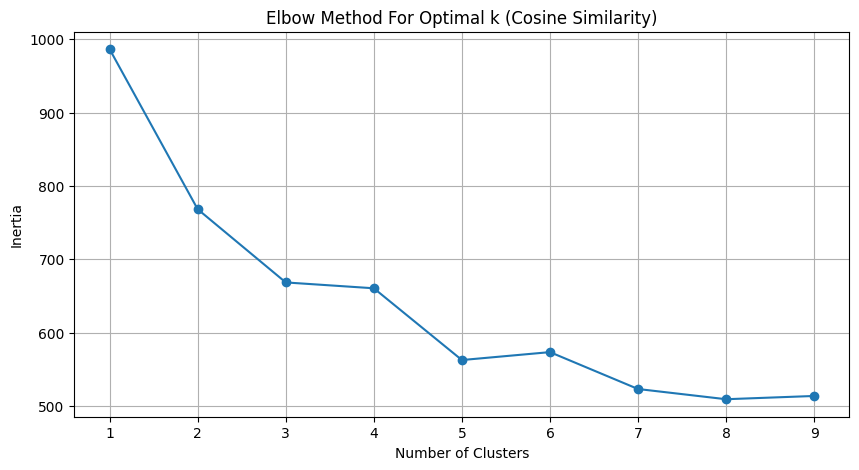

In [62]:
def optimise_k_means_cosine(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k):
        # Initialize KMeans with k clusters and explicitly set n_init to avoid future warnings
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
        try:
            # Fit the KMeans algorithm on the normalized data
            kmeans.fit(data)
            # Append the number of clusters and the corresponding inertia to their lists
            means.append(k)
            inertias.append(kmeans.inertia_)
        except Exception as e:
            print(f"An error occurred while fitting KMeans for k={k}: {str(e)}")

    # Plotting the elbow plot to determine the optimal number of clusters
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k (Cosine Similarity)')
    plt.grid(True)
    plt.show()

# Assuming normalized_data is correctly defined above
optimise_k_means_cosine(data_normalized, 10)

### 5. Creazione per ogni utente della lista degli n items (top k items) da consigliare
(es. considerando il rating predetto)

In [54]:
import pandas as pd

# Definisci il numero di raccomandazioni per utente (n)
n = 10

# Ordina i dati per ogni utente basandoti sul rating predetto e seleziona i top n items
def get_top_n_recommendations(user_data, n):
    # Ordina gli articoli in base al rating predetto in ordine decrescente
    return user_data.sort_values(by='rating', ascending=False).head(n)

# Applica la funzione a tutti gli utenti
recommendations = {user_id: get_top_n_recommendations(user_data, n)
                   for user_id, user_data in prediction_matrix.groupby('user_id')}

# Seleziona un user_id a caso
random_user_id = np.random.choice(list(recommendations.keys()))

# Visualizza le raccomandazioni per l'utente selezionato a caso
print(f"Top {n} recommendations for user {random_user_id}:")
print(recommendations[random_user_id])


Top 10 recommendations for user AGLQDDJTHRGIY4KWEXLA3YBD47PQ:
                            user_id        asin  rating
514    AGLQDDJTHRGIY4KWEXLA3YBD47PQ  1958945005   5.000
99459  AGLQDDJTHRGIY4KWEXLA3YBD47PQ  0486479447   4.477
99446  AGLQDDJTHRGIY4KWEXLA3YBD47PQ  B078VWDNKT   4.477
99447  AGLQDDJTHRGIY4KWEXLA3YBD47PQ  B00NIFXWH2   4.477
99448  AGLQDDJTHRGIY4KWEXLA3YBD47PQ  1786270064   4.477
99449  AGLQDDJTHRGIY4KWEXLA3YBD47PQ  1568987609   4.477
99450  AGLQDDJTHRGIY4KWEXLA3YBD47PQ  0393064425   4.477
99451  AGLQDDJTHRGIY4KWEXLA3YBD47PQ  1862008728   4.477
99452  AGLQDDJTHRGIY4KWEXLA3YBD47PQ  0470294191   4.477
99453  AGLQDDJTHRGIY4KWEXLA3YBD47PQ  0192801422   4.477


### 6. Filling della matrice di rating attraverso Matrix Factorization in aggiunta a K-NN e confronto dei risultati ottenuti in termini di MSE e RMSE

In [55]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Definizione del formato dei dati
reader = Reader(rating_scale=(1, 5))

# Caricamento dei dati nel formato di Surprise
data = Dataset.load_from_df(rating_matrix[['user_id', 'asin', 'rating']], reader)

# Divisione del dataset in train e test
trainset, testset = model_selection.train_test_split(dataset_surprise, test_size=0.2, random_state=0)


In [56]:
from surprise import KNNBasic

# Configurazione e addestramento del modello KNN
knn = KNNBasic()
knn.fit(trainset)

# Predizioni sul test set
knn_predictions = knn.test(testset)

# Calcolo di MSE e RMSE per KNN
knn_mse = accuracy.mse(knn_predictions)
knn_rmse = accuracy.rmse(knn_predictions)


Computing the msd similarity matrix...
Done computing similarity matrix.
MSE: 0.9490
RMSE: 0.9742


In [57]:
from surprise import SVD

# Configurazione e addestramento del modello SVD
svd = SVD()
svd.fit(trainset)

# Predizioni sul test set
svd_predictions = svd.test(testset)

# Calcolo di MSE e RMSE per SVD
svd_mse = accuracy.mse(svd_predictions)
svd_rmse = accuracy.rmse(svd_predictions)


MSE: 0.8763
RMSE: 0.9361


In [58]:
print(f"KNN - MSE: {knn_mse}, RMSE: {knn_rmse}")
print(f"SVD - MSE: {svd_mse}, RMSE: {svd_rmse}")


KNN - MSE: 0.949, RMSE: 0.9741663102366043
SVD - MSE: 0.8763455071141731, RMSE: 0.9361332742265778
